# Estimation of the magnetic amplitude from total-field anomaly data using equivalent layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import pandas as pd
import matplotlib as mpb
import scipy.stats as sp
import scipy.ndimage
import matplotlib.patches as patches
from fatiando.vis import mpl
from fatiando.gridder import regular
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

# Input

### Importing TFA data

In [3]:
data = pd.read_csv('anitapolis_decimated_tfa_residual.txt', skipinitialspace=True, delim_whitespace=True)

In [4]:
mask = (data['Y'] <= 693000) & (data['Y'] >= 683000.) & (data['X'] <= 6926000.) & (data['X'] >= 6916000.)
dataset2 = data[mask]
dataset2.to_csv('anitapolis_decimated_tfa_residual_cut.txt', index=None, sep=' ', mode='w')

In [5]:
xt = dataset2['X'].get_values()
yt = dataset2['Y'].get_values()
zt = dataset2['GPSALT'].get_values()
alt = dataset2['ALTURA'].get_values()
dobs2 = dataset2['mag_res1'].get_values()

In [6]:
xp = data['X'].get_values()
yp = data['Y'].get_values()
zp = - data['GPSALT'].get_values()
dobs = data['mag_res1'].get_values()

In [7]:
topo = -zt + alt

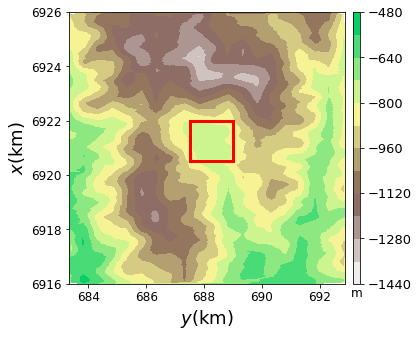

In [8]:
fig, ax = plt.subplots(1, figsize=(6,5))
#plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontourf(yt, xt, topo, 10, cmap='terrain_r', vmax = -200).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('m', pad=-285)
# Create a Rectangle patch
rect = patches.Rectangle((687500.,6920500.),1500,1500,linewidth=3,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
mpl.m2km()
#plt.savefig(mypath+'anitapolis_topo_gps.png', dpi=300)
plt.show()

In [9]:
mask = (data['Y'] <= 689000) & (data['Y'] >= 687500.) & (data['X'] <= 6922000.) & (data['X'] >= 6920500.)
dataset3 = data[mask]

In [10]:
np.mean(dataset3['GPSALT'] - dataset3['ALTURA'])

771.1680555555556

In [11]:
xt = dataset2['X'].get_values()
yt = dataset2['Y'].get_values()
zt = dataset2['GPSALT'].get_values()
alt = dataset2['ALTURA'].get_values()
dobs2 = dataset2['mag_res1'].get_values()

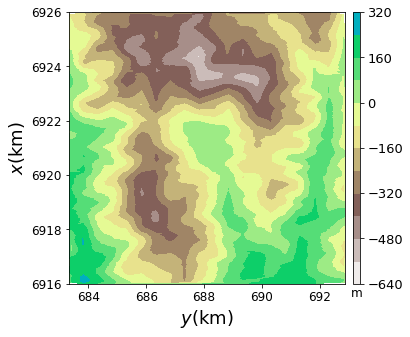

In [12]:
fig, ax = plt.subplots(1, figsize=(6,5))
#plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontourf(yt, xt, topo+800, 10, cmap='terrain_r', vmax = 500).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('m', pad=-285)
mpl.m2km()
#plt.savefig(mypath+'anitapolis_topo_gps.png', dpi=300)
plt.show()

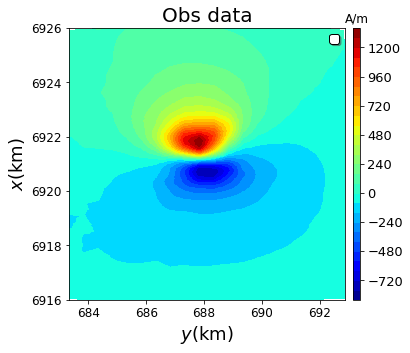

In [13]:
plt.figure(figsize=(6,5))
plt.title('Obs data', fontsize=20)
plt.tricontourf(yt, xt, dobs2, 30, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.show()

In [14]:
# main field
inc = -37.05
dec = -18.17

#figura
incs = -21
decs = -11

In [15]:
h = np.zeros(xp.size) + 500.  # layer depth
A_tf = msf.sm_tf_sphere(xp, yp, zp+800, xp, yp, h, inc, dec, incs, decs)

In [16]:
I = np.identity(xp.size)
f0 = np.trace(np.dot(A_tf.T, A_tf))/xp.size
u0 = 0.00001

In [17]:
vp = np.linalg.solve(np.dot(A_tf.T,A_tf) + u0*f0*I,np.dot(A_tf.T,dobs))

In [18]:
tf = np.dot(A_tf,vp)

In [19]:
np.min(topo+800)

-568.6800000000001

In [20]:
z_up = -800.
area = [6916000., 6926000, 683000., 693000]
shape = (50, 50)
x, y, z = regular(area, shape, z=z_up)

In [21]:
A_up = msf.sm_tf_sphere(xp, yp, zp+800, xp, yp, h, inc, dec, incs, decs)
upward_tfa = np.dot(A_up, vp)

In [22]:
mypath = 'eqlayer_rs/direction_inc%d_dec%d_h%dm/' % (incs, decs, h[0])
if not os.path.isdir(mypath):
   os.makedirs(mypath)

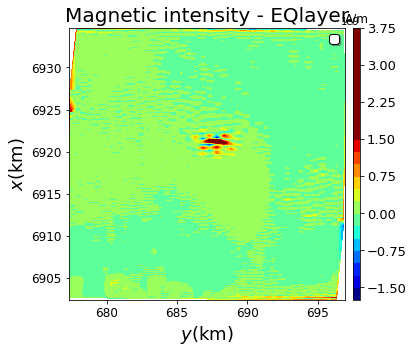

In [23]:
plt.figure(figsize=(6,5))
plt.title('Magnetic intensity - EQlayer', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(vp), vmax=-np.min(vp))
plt.tricontourf(yp, xp, vp, 20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('momentum_mag_intensity_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


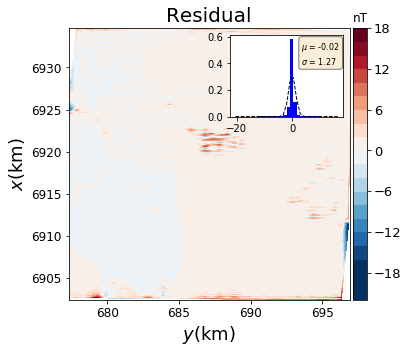

In [24]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(dobs-tf)*(-1), vmax=np.max(dobs-tf))
plt.tricontourf(yp, xp, dobs-tf, 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(dobs-tf)
std = np.std(dobs-tf)
nbins=30
n, bins, patches = plt.hist(dobs-tf,bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.63, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
plt.savefig(mypath+'diorama_tfa_residual.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

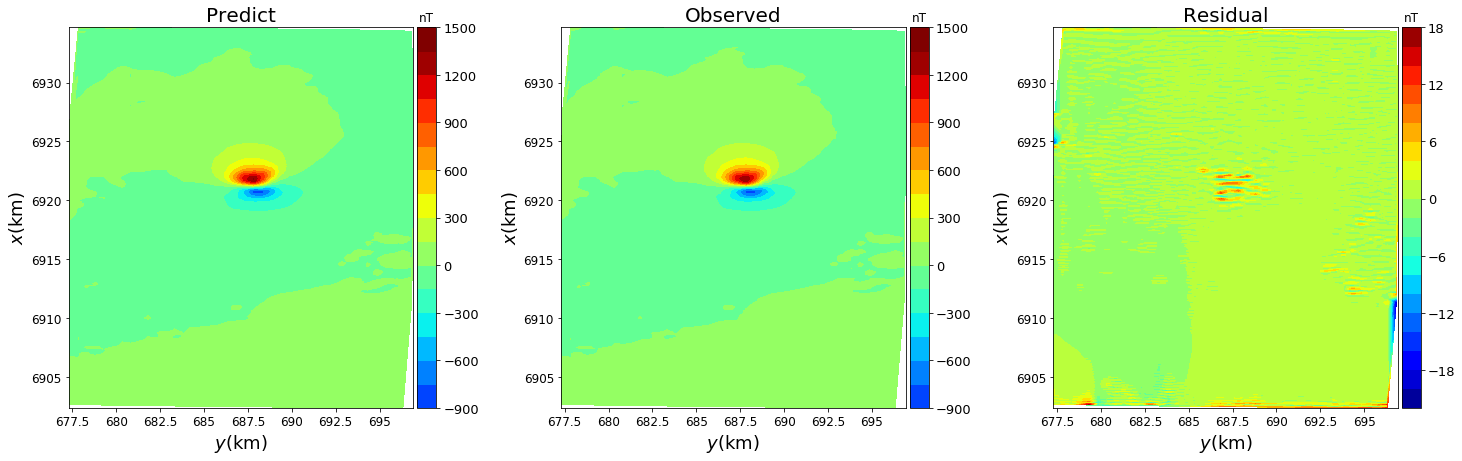

In [25]:
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, tf,20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='jet', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, dobs - tf, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'anitapolis_eqlayer_fit_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

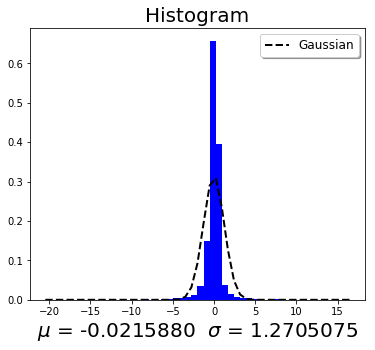

In [26]:
mean = np.mean(dobs - tf)
std = np.std(dobs - tf)
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=50
n, bins, patches = plt.hist(dobs - tf,bins=nbins, normed=True, color='blue')
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.xticks(np.linspace(-100*std, 100*std, 5),)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'anitapolis_tfa_hist_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

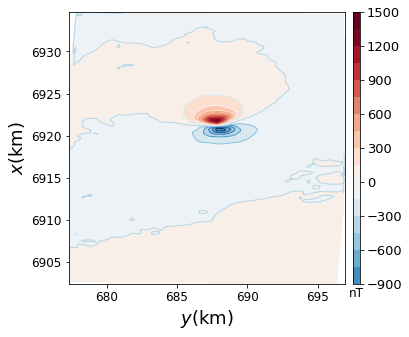

In [27]:
plt.figure(figsize=(6,5))
#plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontour(yp, xp, upward_tfa, 20, linewidths=1, cmap='RdBu_r')
plt.tricontourf(yp, xp, upward_tfa, 20, cmap='RdBu_r',
               vmin=-np.max(upward_tfa),
               vmax=np.max(upward_tfa)).ax.tick_params(labelsize=12)
#plt.plot(y, x, 'ko', markersize=.5)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT', pad=-285)
mpl.m2km()
plt.savefig(mypath+'anitapolis_tfa_upward_%dm_inc%d_dec%d.png' % (z_up, incs, decs), dpi=300)
plt.show()

In [28]:
A_bx = msf.sm_bx_sphere(xp, yp, zp+800, xp, yp, h, incs, decs)

Bx = np.dot(A_bx,vp)

In [29]:
A_by = msf.sm_by_sphere(xp, yp, zp+800, xp, yp, h, incs, decs)

By = np.dot(A_by,vp)

In [30]:
A_bz = msf.sm_bz_sphere(xp, yp, zp+800, xp, yp, h, incs, decs)

Bz = np.dot(A_bz,vp)

In [31]:
mag_amp = np.sqrt(Bx**2 + By**2 + Bz**2)

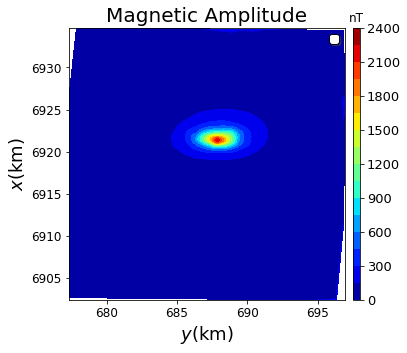

In [32]:
plt.figure(figsize=(6,5))
plt.title('Magnetic Amplitude', fontsize=20)
plt.tricontourf(yp, xp, mag_amp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'magnetic_amplitude_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

ValueError: z array must have same length as triangulation x and y arrays

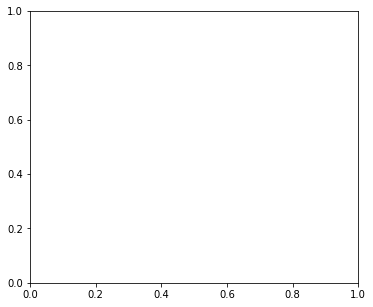

In [33]:
plt.figure(figsize=(20,5))

ax=plt.subplot(1,3,1)
plt.tricontourf(yp, xp, -dataset2['GPSALT']+800, 20, cmap='terrain_r').ax.tick_params(labelsize=12)
plt.title('Coord. Verticais')
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT', pad=-285)
mpl.m2km()

ax=plt.subplot(1,3,2)
plt.tricontourf(yp, xp, -dataset2['ALTURA'], 20, cmap='terrain_r').ax.tick_params(labelsize=12)
plt.title('Laser')
plt.plot(yt, xt, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-285)
clb.ax.tick_params(labelsize=13)
mpl.m2km()

ax=plt.subplot(1,3,3)
plt.title('Topografia')
plt.tricontourf(yp, xp, -(zp - alt), 12, cmap='terrain_r').ax.tick_params(labelsize=12)
plt.plot(yt, xt, 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-285)
clb.ax.tick_params(labelsize=13)
mpl.m2km()

plt.savefig(mypath+'data_alt.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
eqlayer = dict()

In [35]:
eqlayer['layer_depth'] = h[0]
eqlayer['regularization'] = u0
eqlayer['layer_parameters'] = vp
eqlayer['upward'] = upward_tfa
eqlayer['amf'] = mag_amp
eqlayer['x'] = x
eqlayer['y'] = y
eqlayer['xp'] = xp
eqlayer['yp'] = yp
eqlayer['zp'] = zp
eqlayer['xt'] = xt
eqlayer['yt'] = yt
eqlayer['zt'] = zt
eqlayer['obs_tfa'] = dobs2
eqlayer['topography'] = topo
eqlayer['z_shifted'] = - zt + 800.
eqlayer['z'] = np.zeros(x.size) + z_up

In [36]:
file_name = mypath+'/eqlayer_depth%dm_zup%dm.pickle' % (h[0],z_up)
with open(file_name, 'w') as f:
    pickle.dump(eqlayer, f)

In [ ]:
np.mean(zt - alt)

In [40]:
amf_data = {'x':xp, 'y': yp, 'z': zp, 'amf': mag_amp, 'bx': Bx, 'by': By, 'bz': Bz}
data_amf = pd.DataFrame(amf_data)

In [41]:
data_amf.to_csv('anitapolis_decimated_amf_cut.txt', index=None, sep=' ', mode='w')